<a href="https://colab.research.google.com/github/minchi19/beer_review/blob/main/beer_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set1")
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Please change file variable to path of your dataset.


Detecting encoding of dataset

In [4]:
import chardet
file = "/content/drive/MyDrive/BeerDataScienceProject.csv"
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [5]:
df = pd.read_csv(file, encoding = "ISO-8859-1")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [7]:
df.head(2)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097


In [8]:
df['review_time'] = pd.to_datetime( df['review_time'], unit = 's' )

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   beer_ABV            508590 non-null  float64       
 1   beer_beerId         528870 non-null  int64         
 2   beer_brewerId       528870 non-null  int64         
 3   beer_name           528870 non-null  object        
 4   beer_style          528870 non-null  object        
 5   review_appearance   528870 non-null  float64       
 6   review_palette      528870 non-null  float64       
 7   review_overall      528870 non-null  float64       
 8   review_taste        528870 non-null  float64       
 9   review_profileName  528755 non-null  object        
 10  review_aroma        528870 non-null  float64       
 11  review_text         528751 non-null  object        
 12  review_time         528870 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64

In [10]:
df["review_time"]

0        2009-02-16 20:57:03
1        2009-03-01 13:44:57
2        2009-03-01 14:10:04
3        2009-02-15 19:12:25
4        2010-12-30 18:53:26
                 ...        
528865   2008-03-11 05:18:41
528866   2008-02-20 06:59:43
528867   2008-01-26 04:14:57
528868   2008-01-24 22:54:50
528869   2008-01-14 18:46:07
Name: review_time, Length: 528870, dtype: datetime64[ns]

In [11]:
df.shape

(528870, 13)

Handling Null values

In [12]:
print("Missing values in Dataset:", df.isnull().sum())


Missing values in Dataset: beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64


In [13]:
df = df.dropna(axis =0)

In [14]:
df.isnull().sum()

beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508358 entries, 0 to 528796
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   beer_ABV            508358 non-null  float64       
 1   beer_beerId         508358 non-null  int64         
 2   beer_brewerId       508358 non-null  int64         
 3   beer_name           508358 non-null  object        
 4   beer_style          508358 non-null  object        
 5   review_appearance   508358 non-null  float64       
 6   review_palette      508358 non-null  float64       
 7   review_overall      508358 non-null  float64       
 8   review_taste        508358 non-null  float64       
 9   review_profileName  508358 non-null  object        
 10  review_aroma        508358 non-null  float64       
 11  review_text         508358 non-null  object        
 12  review_time         508358 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64

Handling Duplicate values

In [16]:
df.loc[df.duplicated(['review_profileName','beer_beerId'],keep=False)][['review_profileName','beer_name','beer_beerId','review_overall']]

,review_profileName,beer_name,beer_beerId,review_overall
176,barleywinefiend,Caldera Pale Ale,25414,4.0
187,barleywinefiend,Caldera Pale Ale,25414,4.0
379,barleywinefiend,Caldera IPA,10784,4.0
415,barleywinefiend,Caldera IPA,10784,3.5
787,flexabull,Ashland Amber,10785,4.0
...,...,...,...,...
528420,scubachopper,Tiger Beer,2176,2.5
528486,basica,Tiger Beer,2176,3.5
528489,spinrsx,Tiger Beer,2176,3.0
528497,basica,Tiger Beer,2176,2.5


Some users reviewed the same beer more than one time. We would keep the highest rating that user gave.

In [17]:
df = df.sort_values("review_overall",ascending=False)
df = df.drop_duplicates(subset = ['review_profileName','beer_beerId'],keep='first')
df = df.drop_duplicates(subset = ['review_profileName','beer_name'],keep='first')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502769 entries, 492945 to 39638
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   beer_ABV            502769 non-null  float64       
 1   beer_beerId         502769 non-null  int64         
 2   beer_brewerId       502769 non-null  int64         
 3   beer_name           502769 non-null  object        
 4   beer_style          502769 non-null  object        
 5   review_appearance   502769 non-null  float64       
 6   review_palette      502769 non-null  float64       
 7   review_overall      502769 non-null  float64       
 8   review_taste        502769 non-null  float64       
 9   review_profileName  502769 non-null  object        
 10  review_aroma        502769 non-null  float64       
 11  review_text         502769 non-null  object        
 12  review_time         502769 non-null  datetime64[ns]
dtypes: datetime64[ns](1), flo

Removing Outlier

The rating score should be scaled between 1 to 5,however,in the data frame described above, we can find that there are reviews with a score below 1 in the column review_overall and review_apperance. Therefore, we should remove the outliers.

In [19]:
round(df.describe(),2)


,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma
count,502769.00,502769.00,502769.00,502769.00,502769.00,502769.00,502769.00,502769.00
mean,7.02,21860.06,2531.71,3.87,3.77,3.84,3.78,3.83
std,2.21,22144.35,5238.38,0.60,0.68,0.71,0.67,0.72
min,0.01,5.00,1.00,0.00,1.00,0.00,1.00,1.00
25%,5.30,1692.00,132.00,3.50,3.50,3.50,3.50,3.50
50%,6.50,13896.00,392.00,4.00,4.00,4.00,4.00,4.00
75%,8.50,40477.00,1303.00,4.00,4.00,4.50,4.00,4.50
max,57.70,77310.00,27980.00,5.00,5.00,5.00,5.00,5.00


In [20]:
df = df.loc[(df.review_overall>=1) & (df.review_appearance>=1)]
round(df.describe(),2)

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma
count,502766.00,502766.00,502766.00,502766.00,502766.00,502766.00,502766.00,502766.00
mean,7.02,21860.17,2531.72,3.87,3.77,3.84,3.78,3.83
std,2.21,22144.37,5238.39,0.60,0.68,0.71,0.67,0.72
min,0.01,5.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,5.30,1692.00,132.00,3.50,3.50,3.50,3.50,3.50
50%,6.50,13896.00,392.00,4.00,4.00,4.00,4.00,4.00
75%,8.50,40480.00,1303.00,4.00,4.00,4.50,4.00,4.50
max,57.70,77310.00,27980.00,5.00,5.00,5.00,5.00,5.00


In [21]:
df.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')

Rank top 3 Breweries which produce the strongest beers?

In [22]:
abv = df[['beer_name','beer_brewerId','beer_ABV']]\
    .drop_duplicates(['beer_name','beer_brewerId'])\
    .pivot_table(index="beer_brewerId", aggfunc=("count",'mean','median'))

# Adjust column names


In [23]:
abv.columns = abv.columns.to_series().str.join('_')

# Reset index
abv.reset_index(inplace=True)

# Rename column
abv.rename(columns={'beer_abv_count':'beer_count'}, inplace=True)

In [24]:
abv.head(3)

,beer_brewerId,beer_ABV_count,beer_ABV_mean,beer_ABV_median
0,1,13,4.876923,4.70
1,3,40,6.237500,5.80
2,5,8,4.837500,4.85


In [25]:
abv_mean = abv.sort_values('beer_ABV_mean', ascending=False)

In [26]:
abv_mean.head(3)

,beer_brewerId,beer_ABV_count,beer_ABV_mean,beer_ABV_median
698,6513,10,24.690000,16.0
165,736,3,13.500000,14.0
1464,24215,3,12.466667,11.0


In [27]:
abv.sort_values('beer_ABV_median', ascending=False).head(3)

,beer_brewerId,beer_ABV_count,beer_ABV_mean,beer_ABV_median
698,6513,10,24.69,16.0
165,736,3,13.50,14.0
788,8540,2,11.50,11.5



Answer1:
Top 3 Breweries which produce the strongest beers according to mean ABV are beer_brewerId 6513,736,24215

Top 3 Breweries which produce the strongest beers according to median ABV are beer_brewerId 6513,736,8540


In [28]:
df.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')

2 Which year did beers enjoy the highest ratings?

In [29]:
df[[ 'review_time' ]].groupby(df[ 'review_time' ].dt.year).agg( [ 'count' ] )


,review_time
,count
review_time,
1998,11
1999,10
2000,29
2001,537
2002,6716
2003,16259
2004,20993
2005,27453


In [30]:
df.groupby(df["review_time"].dt.year).review_overall.mean()

review_time
1998    4.045455
1999    4.000000
2000    4.241379
2001    3.963687
2002    3.822886
2003    3.775693
2004    3.807436
2005    3.846319
2006    3.809792
2007    3.820352
2008    3.841215
2009    3.869223
2010    3.870411
2011    3.834009
2012    3.839438
Name: review_overall, dtype: float64

Answer2:

As seen above year 2000 got the highest mean raiting of 4.24 while year 2011 recived the highest review count of 107023 reviews.


In [31]:
df.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')

3 Based on the user’s ratings which factors are important among taste, aroma,
appearance, and palette?

Text(0.5, 1.0, 'Spearman Correlation')

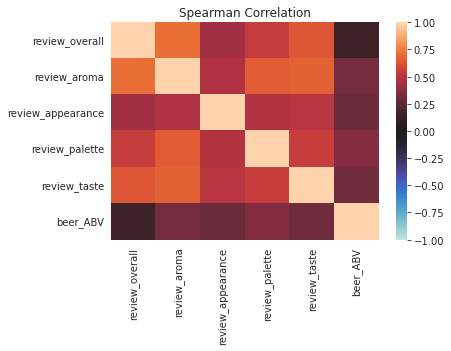

In [32]:
sns.heatmap( df[ [ 'review_overall', 'review_aroma', 'review_appearance', 'review_palette', 'review_taste', 'beer_ABV' ] ].corr( method = 'spearman' ), center = 0,  vmin = -1, vmax = 1 )
plt.title( 'Spearman Correlation' )

In [33]:
df.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')

Answer 3 

In terms of correlation matrix (Spearman), the ranking seems to be: taste, palate, aroma and appearance.

Now training a linear regression model to verify.

In [34]:
linear_model = LinearRegression(  )

In [35]:
linear_model.fit( X = df[ [ 'review_aroma', 'review_appearance', 'review_palette', 'review_taste' ] ], y = df[ 'review_overall' ] )
preds = linear_model.predict( df[ [ 'review_aroma', 'review_appearance', 'review_palette', 'review_taste' ] ] )

In [36]:
linear_model.coef_
# Coeffifients for each feature (aroma, appearance, palate, taste)

array([0.55215806, 0.03301437, 0.04482984, 0.25889153])

In [37]:
np.sqrt( mean_squared_error( df[ 'review_overall' ], preds ) )

0.42198066377243065

Answer 3:

As seen by correlation, linear regression also tells us Aroma and taste are the most important factor based on user rating

4 If you were to recommend 3 beers to your friends based on this data which ones will
you recommend?

In [39]:
# Finding beer with highest overall rating
top_3 = df[['beer_name','review_overall']].pivot_table(index="beer_name", aggfunc=("count",'mean','median')).dropna()

# Rename columns and flatten pivot table
top_3.columns = top_3.columns.to_series().str.join('_')
top_3.reset_index(inplace=True)

# Filter for highest rated beers
top_3 = top_3.query('review_overall_count >= 1000').sort_values('review_overall_mean', ascending=False).head(3)

top_3

,beer_name,review_overall_count,review_overall_mean,review_overall_median
4661,Founders KBS (Kentucky Breakfast Stout),1873,4.402029,4.5
12865,Tröegs Nugget Nectar,1878,4.394835,4.5
4614,Founders Breakfast Stout,2443,4.359394,4.5


Answer 4

The approch to find the recommendation, first narrow down to the most popular beers and subsequently find the highest rated beers amongst that subset.

These are the 3 beers with highest review average

5 Which Beer style seems to be the favorite based on reviews written by users?

In [38]:
Top_rating_beer_styles = df[['beer_style','review_overall']].groupby('beer_style').review_overall.agg('mean').sort_values(ascending = False).iloc[0:10]
Top_rating_beer_styles = pd.DataFrame(Top_rating_beer_styles)
Top_rating_beer_styles

,review_overall
beer_style,
Gueuze,4.139513
Berliner Weissbier,4.124242
American Double / Imperial Stout,4.101586
Oatmeal Stout,4.095110
Eisbock,4.082902
Rye Beer,4.077281
Dortmunder / Export Lager,4.071470
Roggenbier,4.054745
Quadrupel (Quad),4.053349


Answer 5

Based on mean overall review,Gueuze is the most popular beer style followed by Berliner Weissbier	*italicised text*


0

How does written review compare to overall review score for the beer styles?
7. How do find similar beer drinkers by using written reviews only?

In [44]:
df.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')

In [50]:
df["review_overall"].median()

4.0

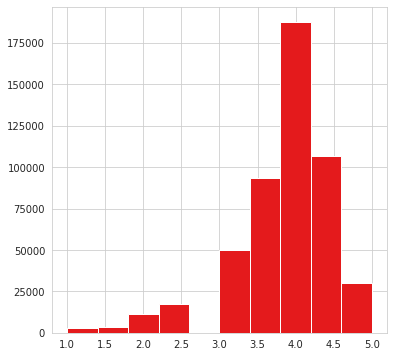

In [49]:
df["review_overall"].hist(figsize=(6,6))
plt.show()

The median is 4. It means the ratings are skewed toward high values.